# 주식 가격의 PCA
### data science study pg 244~248

### 1) 미국, 일본, 유럽, 한국의 과거 20년간 주가 살펴보기
~~~
참고사항: 주식 데이터 불러오는 방법 (pandas_datareader)
~~~
https://wendys.tistory.com/174

In [2]:
import pandas as pd
pd.core.common.is_list_like=pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

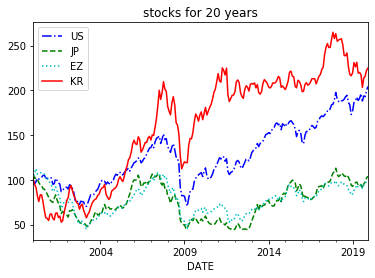

In [18]:
symbols=[
    'SPASTT01USM661N',    #US: 미국
    'SPASTT01JPM661N',    #JP: 일본
    'SPASTT01EZM661N',    #EZ: 유럽
    'SPASTT01KRM661N',    #KR: 한국
]

data=pd.DataFrame()

for sym in symbols:
    data[sym]=web.DataReader(sym, data_source='fred',
                            start=datetime.datetime(2000, 1, 1),
                            end=datetime.datetime(2019, 12, 31))[sym]
    
data.columns=['US', 'JP', 'EZ', 'KR']
data=data/data.iloc[0]*100         #iloc은 위치 정수를 기반으로 indexing

styles=['b-.', 'g--', 'c:', 'r-']    #style=['s-','o-','^-']등으로 디자인을 담기
data.plot(style=styles)              # style은 디자인을 담는 keyword
plt.title('stocks for 20 years')
plt.show()

#### 앞의 차트는 시작시점의 주가가 100이 되도록 트기를 조정. 이 데이터로부터 연간 주식수익율 데이터를 구하면 20 X 4크기의 특징행렬을 구할 수 있다

In [19]:
df=((data.pct_change()+1).resample('A').prod()-1).T*100
print(df.iloc[:, :5])    #iloc은 위치 정수를 기반으로 indexing

DATE  2000-12-31  2001-12-31  2002-12-31  2003-12-31  2004-12-31
US      1.629238   -9.638213  -17.680773   23.135271   14.233654
JP    -19.382211  -23.827406  -16.923968   19.628102    9.945947
EZ     -1.966837  -21.857080  -30.647772   12.066127   10.551998
KR    -45.401205   27.644005    4.448180   15.121124    9.091136


### 연간 주식수익율 데이터를 그래프로 나타내기
~~~
붓꽃 데이터보다 차원은 증가했지만 각 표본이 가지는 측정 데이터 벡터 모양이 비슷하다
붓꽃이 측정 데이터 값을 결정하는 '크기'라는 잠재변수 처럼 각 나라의 수익률은 '경제적 요인'이라는 공통된 잠재변수에 의해서 결정
~~~

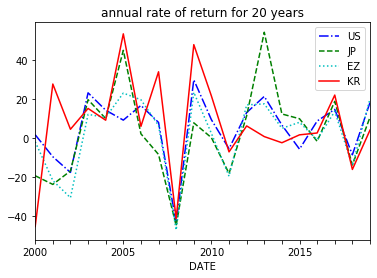

In [20]:
df.T.plot(style=styles)
plt.title('annual rate of return for 20 years')   # 과거 20년간 연간수익율
plt.xticks(df.columns)    #indexing 된 column값들을 ticks로 사용
plt.show()

### PCA 분석을 통해 모든 나라의 주가 움직임 기저에 깔려있는 성분 살펴보기

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca2=PCA(n_components=1)    #입력인수: 정수
w=pca2.fit_transform(df)    #특정행렬을 낮은 차원의 근사행렬로 변환

In [23]:
m=pca2.mean_                #평균벡터

In [24]:
p1=pca2.components_[0]      #주성분벡터

### 이 두가지 성분을 차트로 나타내기
~~~
편균주가로부터 주성분이 더해질수록 주가의 형태 변화 양상을 보기

평균 주가: 굵은 선
나머지 주가: 주성분이 점점 많이 추가됨에 따라 어떤 주가 형태로 변하는지 표시

여기서 주성분의 모습을 잘 보이게 하려고 주성분을 과장해서 표시
~~~

In [25]:
import numpy as np

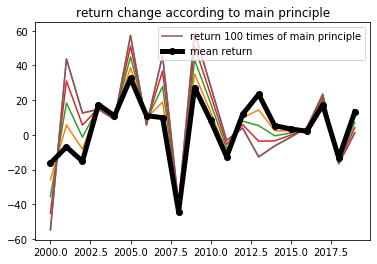

In [27]:
xrange=np.linspace(2000, 2019, 20, dtype=int)    #2000~2019를 균일 간격으로 20개 나누기
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_+p1*i)
    
plt.plot(xrange, pca2.mean_+p1*100, label='return 100 times of main principle')    #주성분의 100배를 추가한 수익률
plt.plot(xrange, pca2.mean_, 'ko-', lw=5, label='mean return')    #'k-': 검은색 직선
plt.title('return change according to main principle')
plt.legend()
plt.show()

### 주성분의 의미 파악 위해 각 나라의 주성분 비중 구하기

In [29]:
df_w=pd.DataFrame(w)
df_w.index=df.index
df_w.columns=['importance of main principle']
print(df_w)

    importance of main principle
US                    -14.081557
JP                    -31.195809
EZ                    -24.018424
KR                     69.295790


### 주성분을 이용하여 구한 근사 주가

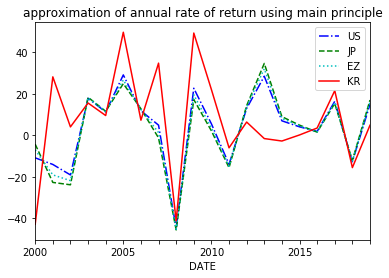

In [31]:
df_i=pd.DataFrame(pca2.inverse_transform(w))     #변환된 근사행렬은 원래 차원으로 복귀
df_i.index=df.index
df_i.columns=df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title('approximation of annual rate of return using main principle')   #주성분을 사용한 연간 수익율 근사치
plt.xticks(df.columns)   
plt.show()

~~~
이 결과로부터 우리가 구한 주성분은 미국, 일본, 유럽이라는 데이터로 부터 한국이라는 데이터로 변화시키는 요인, 즉 중진국 요인이라 부를 수 있는 성분으라는 것을 명확하게 알 수 있다.
~~~